In [1]:
from modelTraining import run_model, load_from_file, compute_feature_ranking, plot_metrics, split_set, process_and_plot_combined_notebook
import joblib
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from NeuralNetwork import createMLP, createMLP_variableSizes, OurNeuralNetwork
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler        # Normalizaçao
from sklearn.preprocessing import MinMaxScaler          # Normalizaçao

SEED = 42

In [2]:
num_features = 4

# --- Carregar dataset Iris ---
def load_data_set():
    data = load_iris()
    X = data.data
    y = data.target
    return X, y

def save_model(model, filename):
    joblib.dump(model, filename)
    print(f"Modelo salvo em {filename}")

def load_model(filename):
    model = joblib.load(filename)
    print(f"Modelo carregado de {filename}")
    return model

X_iris, y_iris = load_data_set()

# EX 2

## EX 2.1. - Baseline

### Random Classifier

In [3]:
random_model = DummyClassifier(strategy='uniform', random_state=SEED)
# parameters = {"DummyClassifier": {'strategy': ['most_frequent', 'stratified', 'uniform']}}

metrics_to = run_model(X_iris, y_iris, random_model, "TO", None, "Random Classifier TO", "Random Classifier TO", random_state=SEED)
metrics_tt = run_model(X_iris, y_iris, random_model, "TT", None, "Random Classifier TT", "Random Classifier TT", random_state=SEED)
metrics_cv = run_model(X_iris, y_iris, random_model, "CV-base", None, "Random Classifier CV", "Random Classifier CV", random_state=SEED, feature_ranking=False)


===== Random Classifier TO =====
Confusion Matrix:
[[15 15 20]
 [18 21 11]
 [15 10 25]]
Recall:    0.4067
Precision: 0.4052
F1-Score:  0.4051

===== Random Classifier TT =====
Confusion Matrix:
[[2 6 7]
 [6 4 5]
 [6 2 7]]
Recall:    0.2889
Precision: 0.2815
F1-Score:  0.2820

===== Random Classifier CV (means) =====

Confusion Matrix (Mean +/- Std)
[2. 0. 3.] +/- [0. 0. 0.]
[1. 1. 3.] +/- [0. 0. 0.]
[1. 1. 3.] +/- [0. 0. 0.]
Recall:    0.4000 ± 0.0000
Precision: 0.4444 ± 0.0000
F1-Score:  0.3862 ± 0.0000


### One R

In [4]:
oneR = DecisionTreeClassifier(max_depth=5, random_state=SEED)
# parameters = {"oneR": {
#         'max_depth': [None, 5, 10, 20],
#         'min_samples_split': [2, 5, 10],
#         'criterion': ['gini', 'entropy']
#     }}

metrics_to = run_model(X_iris, y_iris, oneR, "TO", None, "One R TO", "One R TO", random_state=SEED)
metrics_tt = run_model(X_iris, y_iris, oneR, "TT", None, "One R TT", "One R TT", random_state=SEED)
metrics_cv = run_model(X_iris, y_iris, oneR, "CV-base", None, "One R CV", "One R CV", random_state=SEED, feature_ranking=False)


===== One R TO =====
Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]
Recall:    0.9933
Precision: 0.9935
F1-Score:  0.9933

===== One R TT =====
Confusion Matrix:
[[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]
Recall:    0.9333
Precision: 0.9444
F1-Score:  0.9327

===== One R CV (means) =====

Confusion Matrix (Mean +/- Std)
[5. 0. 0.] +/- [0. 0. 0.]
[0.   4.59 0.41] +/- [0.   0.58 0.58]
[0.   0.42 4.58] +/- [0.   0.59 0.59]
Recall:    0.9447 ± 0.0525
Precision: 0.9523 ± 0.0472
F1-Score:  0.9439 ± 0.0537


## EX 2.2.1. - kNN (k = 1)

In [5]:
k = 1
kNN = KNeighborsClassifier(n_neighbors = k)
parameters = {'KNeighborsClassifier' : {
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
        }}

metrics_to = run_model(X_iris, y_iris, kNN, "TO", None, "kNN TO", "kNN TO", random_state=SEED)
metrics_tt = run_model(X_iris, y_iris, kNN, "TT", None, "kNN TT", "kNN TT", random_state=SEED)
metrics_cv = run_model(X_iris, y_iris, kNN, "CV-base", None, "kNN CV", "kNN CV", random_state=SEED)


===== kNN TO =====
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Recall:    1.0000
Precision: 1.0000
F1-Score:  1.0000

===== kNN TT =====
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]
Recall:    0.9333
Precision: 0.9444
F1-Score:  0.9327

===== kNN CV (means) =====

Confusion Matrix (Mean +/- Std)
[5. 0. 0.] +/- [0. 0. 0.]
[0.  4.7 0.3] +/- [0.   0.54 0.54]
[0.   0.32 4.68] +/- [0.   0.49 0.49]
Recall:    0.9587 ± 0.0469
Precision: 0.9646 ± 0.0416
F1-Score:  0.9581 ± 0.0476


## EX 2.2.2. - kNN (k in range(1,16,2))

K value: 1

===== kNN TO k = 1 =====
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Recall:    1.0000
Precision: 1.0000
F1-Score:  1.0000

===== kNN TVT k = 1 =====
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]
Recall:    0.9333
Precision: 0.9444
F1-Score:  0.9327
Modelo salvo em models/ex_2_2_2/kNN_TVT_k_1.pkl.pkl

===== kNN CV k = 1 (means) =====

Confusion Matrix (Mean +/- Std)
[5. 0. 0.] +/- [0. 0. 0.]
[0.  4.7 0.3] +/- [0.   0.54 0.54]
[0.   0.32 4.68] +/- [0.   0.49 0.49]
Recall:    0.9587 ± 0.0469
Precision: 0.9646 ± 0.0416
F1-Score:  0.9581 ± 0.0476
K value: 3

===== kNN TO k = 3 =====
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
Recall:    0.9667
Precision: 0.9668
F1-Score:  0.9667

===== kNN TVT k = 3 =====
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
Recall:    0.9556
Precision: 0.9608
F1-Score:  0.9554
Modelo salvo em models/ex_2_2_2/kNN_TVT_k_3.pkl.pkl

===== kNN CV k = 3 (means) =====

Confusion Matrix (Mean +/- Std)
[5. 0. 0.] +/- [0.

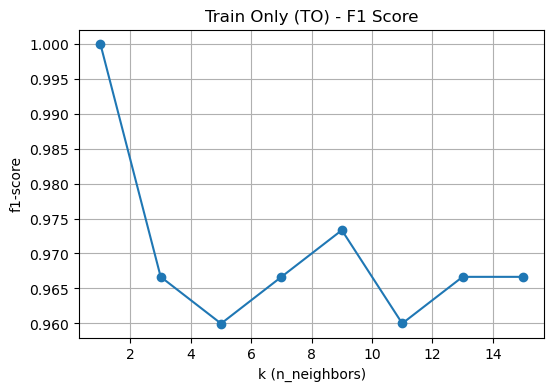

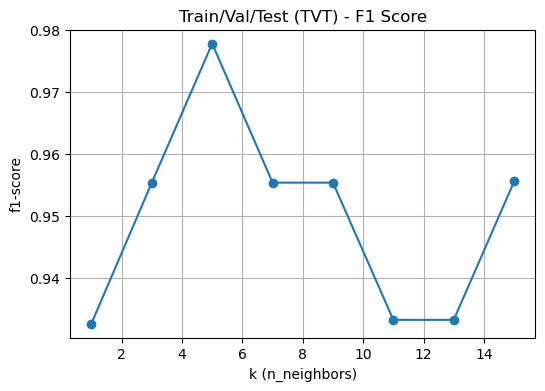

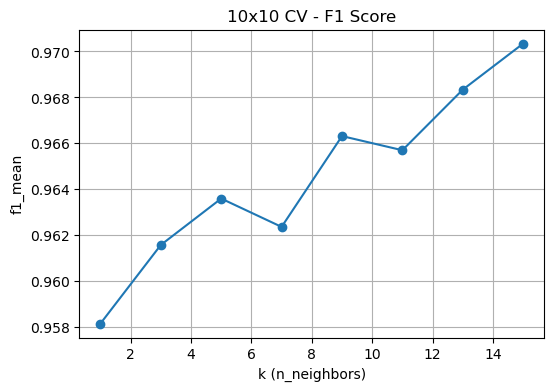

In [6]:
# RUN TIME = 5 seg

parameters = {
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    }

to_scores = []
tvt_scores = []
cv_scores = []

for k in range(1,16,2):
    print("K value:", k)
    kNN = KNeighborsClassifier(n_neighbors = k)

    metrics_to = run_model(X_iris, y_iris, kNN, "TO", None, f"models/ex_2_2_2/kNN_TO_k_{k}.pkl", f"kNN TO k = {k}", random_state=SEED, printing=True)
    metrics_tvt = run_model(X_iris, y_iris, kNN, "TVT", parameters, f"models/ex_2_2_2/kNN_TVT_k_{k}.pkl", f"kNN TVT k = {k}", random_state=SEED, feature_ranking=False, printing=False)
    metrics_cv = run_model(X_iris, y_iris, kNN, "CV-base", parameters, f"models/ex_2_2_2/kNN_CV_k_{k}.pkl", f"kNN CV k = {k}", random_state=SEED, feature_ranking=False, printing=False)

    to_scores.append({
        'k': k,
        'f1-score': metrics_to['f1-score'],
        'recall': metrics_to['recall'],
        'precision': metrics_to['precision'],
        'confusion_matrix': metrics_to['confusion_matrix']
    })

    tvt_scores.append({
        'k': k,
        'f1-score': metrics_tvt['f1-score'],
        'recall': metrics_tvt['recall'],
        'precision': metrics_tvt['precision'],
        'confusion_matrix': metrics_tvt['confusion_matrix']
    })

    cv_scores.append({
        'k': k,
        'f1_mean': metrics_cv['f1-score']
        # 'recall': metrics_cv['recall'],
        # 'precision': metrics_cv['precision'],
        # 'cm_mean': metrics_cv['cm_mean'],
        # 'cm_std': metrics_cv['cm_std']
    })

plot_metrics(to_scores, metric_name='f1-score', title='Train Only (TO) - F1 Score')
plot_metrics(tvt_scores, metric_name='f1-score', title='Train/Val/Test (TVT) - F1 Score')
plot_metrics(cv_scores, metric_name='f1_mean', title='10x10 CV - F1 Score')

## EX 2.3.1. - TVT

Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,0.977778,0.979167,0.977753


TOP 2 features
BEST FEATURES [3 2]


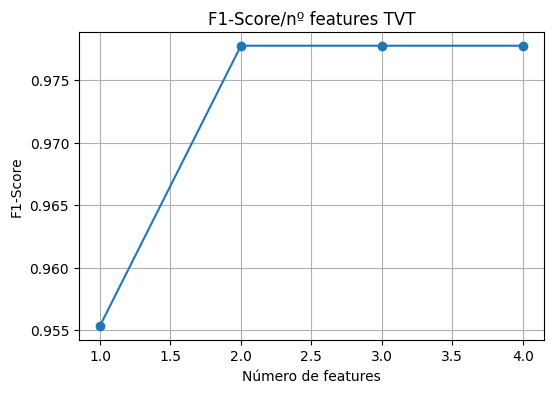

Resultados dos parâmetros guardados em: ./models/ex_2_3_1/ex_2_3_1_tvt_param_set_scores.csv
==========Best Model============
Best features number: 2
Best features: [3 2]
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}

===== EX 2.3.1 TVT - KNN =====
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Recall:    0.9778
Precision: 0.9792
F1-Score:  0.9778
Modelo salvo em ./models/ex_2_3_1/ex_2_3_1_tvt.pkl


In [3]:
model = KNeighborsClassifier()
parameters = {
    'n_neighbors': list(range(1, 16, 2)),      # K: 1, 3, 5, ..., 15
    'weights': ['uniform', 'distance'],        # Como os vizinhos votam
    'metric': ['euclidean', 'manhattan']       # A régua usada para medir distância
}
filename = "./models/ex_2_3_1/ex_2_3_1_tvt"
metrics = run_model(X_iris, y_iris, model, "TVT", parameters, filename, label="EX 2.3.1 TVT - KNN", random_state=SEED, use_iris=True, save_data=True)

## EX 2.4.1. - CV

In [3]:
models = {
        "Random": DummyClassifier(),  
        "kNN": KNeighborsClassifier(),                            # k=5 por defeito
        "OneR": DecisionTreeClassifier(random_state=SEED),        # Decision Tree
        "SVM": SVC(random_state=SEED)                             # SVM com kernel RBF por omissão
        # "ANN": MLPClassifier(random_state=SEED, max_iter=1000)  # Rede Neural
    }

parameters = {

    'Random': {
        'strategy': ['most_frequent', 'stratified', 'uniform'] 
    },

    'kNN' : {
        'n_neighbors': [1, 3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },

    'OneR' : {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },

    'SVM' : {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

# 'ANN': {
#     'hidden_layer_sizes': [(50,), (100,), (50,50)],
#     'activation': ['tanh'],
#     'alpha': [0.0001, 0.001, 0.01]
# } estava a dar o warning: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
}

filename = "./models/ex_2_4_1/ex_2_4_1_cv"
metrics = run_model(X_iris, y_iris, models, "CV", parameters, filename, label="EX 2.4.1 CV", random_state=SEED, save_data=True)

Resultados dos parâmetros guardados em: ./models/ex_2_4_1/ex_2_4_1_cv_Random_1_param_set_scores.csv
==========Best Model Random Fold 1============
Best features number: 1
Best features: [3]
Best Parameters: {'strategy': 'stratified'}
Resultados dos parâmetros guardados em: ./models/ex_2_4_1/ex_2_4_1_cv_kNN_1_param_set_scores.csv
==========Best Model kNN Fold 1============
Best features number: 2
Best features: [3 2]
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}
Resultados dos parâmetros guardados em: ./models/ex_2_4_1/ex_2_4_1_cv_OneR_1_param_set_scores.csv
==========Best Model OneR Fold 1============
Best features number: 1
Best features: [3]
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}
Resultados dos parâmetros guardados em: ./models/ex_2_4_1/ex_2_4_1_cv_SVM_1_param_set_scores.csv
==========Best Model SVM Fold 1============
Best features number: 1
Best features: [3]
Best Parameters: {'C': 0.1, 'kernel': 'linear',

,Mean_F1,Std_F1
Random,0.300748,0.111233
kNN,0.944704,0.059554
OneR,0.952086,0.051988
SVM,0.957377,0.047925


Modelo com maior média de F1: SVM
SVC(random_state=42)
[3, 2, 0, 1] 0.9684175084175085
[[{'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}, 1.0], [{'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}, 1.0], [{'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}, 1.0], [{'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}, 1.0], [{'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}, 1.0], [{'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}, 1.0], [{'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}, 1.0], [{'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}, 1.0], [{'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}, 1.0], [{'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}, 1.0], [{'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}, 1.0], [{'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}, 1.0], [{'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}, 1.0], [{'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}, 1.0], [{'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}, 1.0], [{'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}, 1.0], 

Gráfico salvo também em: ./models/ex_2_4_1/todos_modelos_comparados.png


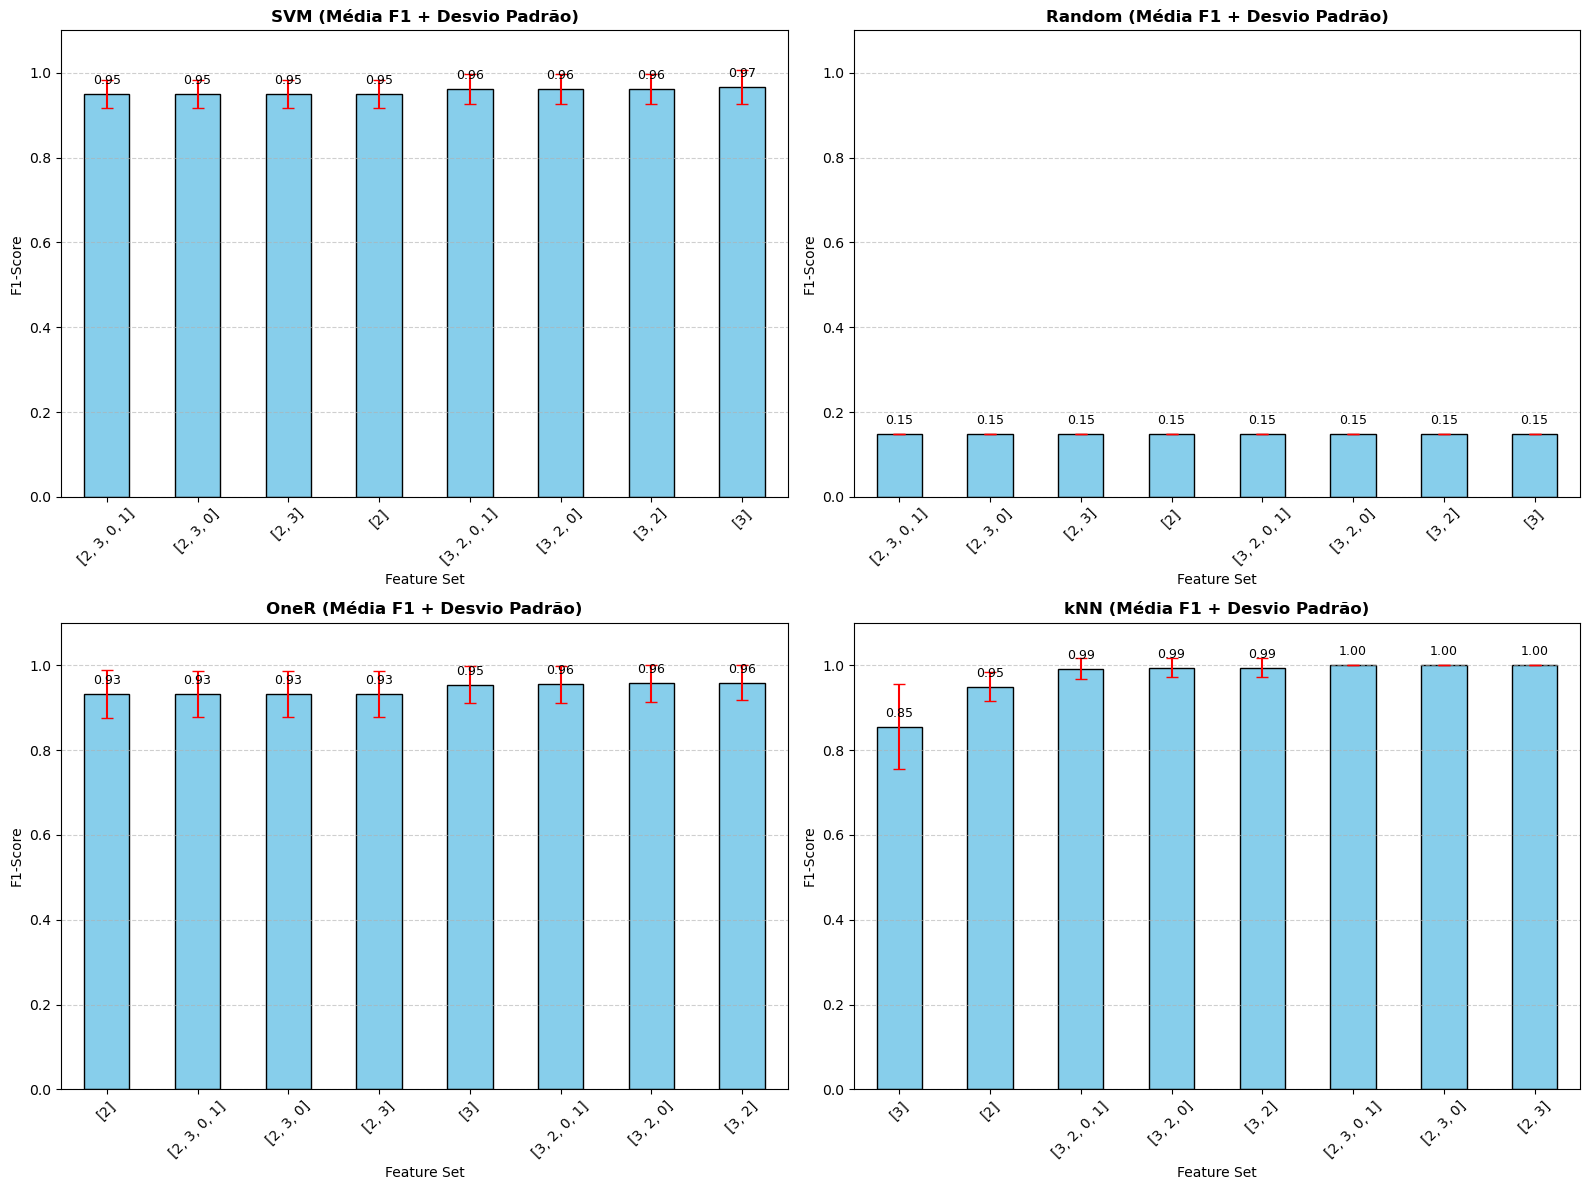

In [2]:
%matplotlib inline

# Executar
process_and_plot_combined_notebook()

## EX 2.5

=== Dataset Filtrado ===
Total amostras: 90
Classe 0 (Setosa):     50
Classe 1 (Versicolor): 30
Classe 2 (Virginica):  10
Score:
[2 3 0 1]


,n_features,recall,precision,f1
0,1,0.777778,0.939394,0.8
1,2,0.777778,0.939394,0.8
2,3,0.777778,0.939394,0.8
3,4,0.777778,0.939394,0.8


TOP 1 features
BEST FEATURES [2]


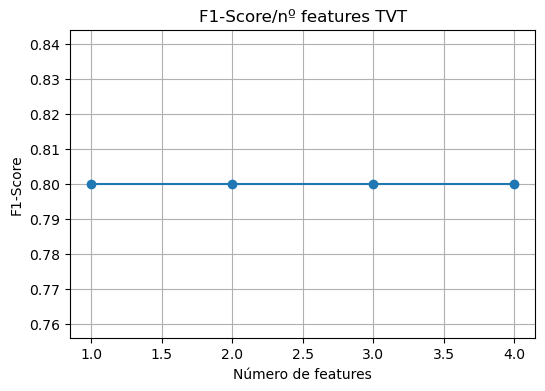

Resultados dos parâmetros guardados em: ./models/ex_2_5/ex_2_5_tvt_imbalanced_param_set_scores.csv

===== EX 2.5 TVT - KNN (Imbalanced 30/10) =====
Confusion Matrix:
[[15  0  0]
 [ 0  9  0]
 [ 0  0  3]]
Recall:    1.0000
Precision: 1.0000
F1-Score:  1.0000
Modelo salvo em ./models/ex_2_5/ex_2_5_tvt_imbalanced.pkl


In [ ]:
ind_0 = np.where(y_iris == 0)[0] # Setosa
ind_1 = np.where(y_iris == 1)[0] # Versicolor
ind_2 = np.where(y_iris == 2)[0] # Virginica

# Selecionar as quantidades pedidas
# Classe 0: Todas (50)
# Classe 1: Apenas 30
# Classe 2: Apenas 10
indices_selecionados = np.concatenate([
    ind_0,          
    ind_1[:30],     
    ind_2[:10]      
])

# Criar os novos arrays desbalanceados
X_filtered = X_iris[indices_selecionados]
y_filtered = y_iris[indices_selecionados]

# shuffle para no split nao ficar o treino so com 1/2 classe - haver variação
X_filtered, y_filtered = shuffle(X_filtered, y_filtered, random_state=SEED)

print("=== Dataset Filtrado ===")
print(f"Total amostras: {len(y_filtered)}")
print(f"Classe 0 (Setosa):     {np.sum(y_filtered == 0)}")
print(f"Classe 1 (Versicolor): {np.sum(y_filtered == 1)}")
print(f"Classe 2 (Virginica):  {np.sum(y_filtered == 2)}")
print("========================")

model = KNeighborsClassifier()

parameters = {
    'n_neighbors': list(range(1, 16, 2)),      # K: 1, 3, 5, ..., 15
    'weights': ['uniform', 'distance'],        # Votação
    'metric': ['euclidean', 'manhattan']       # Distância
}

filename = "./models/ex_2_5/ex_2_5_tvt_imbalanced"

metrics = run_model(
    X_filtered, 
    y_filtered, 
    model, 
    "TVT", 
    parameters, 
    filename, 
    label="EX 2.5 TVT - KNN (Imbalanced 30/10)", 
    random_state=SEED, 
    use_iris=True, 
    save_data=True
)

# EX 3

In [3]:
csv_path = "../A/data_prepared_for_training.csv"

df = pd.read_csv(csv_path)

# Converter para NumPy
data = df.to_numpy()

print("All classes:\t\t", data.shape)

# Filtrar atividades entre 1 e 7 (coluna -2)
data = data[(data[:, -2] >= 1) & (data[:, -2] <= 7)]

print("Selected Classes (1-7):", data.shape)

All classes:		 (13833, 552)
Selected Classes (1-7): (13311, 552)


## EX3.1

In [4]:
# 2. Separar Features (X) e Labels (y)
X = X_features = np.delete(data, -2, axis=1)
y = data[:, -2]

print(X.shape)
print(y.shape)

(13311, 551)
(13311,)


### 3.1.1 Train Only

In [14]:
model = DecisionTreeClassifier(max_depth=5, random_state=SEED)
parameters = {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }

filename = "./models/ex_3_1/ex3.1_OneR_TO.pkl"
metrics = run_model(X, y, model, "TO", parameters, filename, label="EX 3.1 TO - OneR", random_state=SEED, use_iris=False)


===== EX 3.1 TO - OneR =====
Confusion Matrix:
[[2818    0    0    0   21    8    0]
 [   0 1226  296    0    0    0    0]
 [   0   25 1427    0    0    0    0]
 [  17    0    0 2115  365   48    0]
 [  12    0    1 1441 1029   72    0]
 [   0    0    0  102   61 1443    0]
 [   0    0    0   73   47  657    7]]
Recall:    0.7028
Precision: 0.8125
F1-Score:  0.6745


### 3.1.2 Train Test

In [16]:
model = DecisionTreeClassifier(max_depth=5, random_state=SEED)
parameters = {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }

filename = "./models/ex_3_1/ex3.1_OneR_TT.pkl"
metrics = run_model(X, y, model, "TT", parameters, filename, label="EX 3.1 TT - OneR", random_state=SEED, use_iris=False)

Treino: 9805 amostras
Teste: 3506 amostras

===== EX 3.1 TT - OneR =====
Confusion Matrix:
[[690  19  22   3  20   1   0]
 [  0 237 161   0   0   0   0]
 [  0 257 146   0   0   0   0]
 [  6   0   2 335 310  14   0]
 [  5   5   6 243 349  47   0]
 [  0   0   0  39  55 327   4]
 [  0   0   0  15  30 153   5]]
Recall:    0.5287
Precision: 0.5740
F1-Score:  0.5128


### 3.1.3 10x10-fold Cross Validation

In [ ]:
# RUN TIME: 5 min

model = DecisionTreeClassifier(max_depth=5, random_state=SEED)
parameters = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

filename = "./models/ex_3_1/ex3.1_OneR_CV.pkl"
metrics = run_model(X, y, model, "CV-base", parameters, filename, label="EX 3.1 CV - OneR", random_state=SEED, use_iris=False, feature_ranking=False, flagPrintingFoldNumber=False)

Total de folds criados: 100
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
Fold 11
Fold 12
Fold 13
Fold 14
Fold 15
Fold 16
Fold 17
Fold 18
Fold 19
Fold 20
Fold 21
Fold 22
Fold 23
Fold 24
Fold 25
Fold 26
Fold 27
Fold 28
Fold 29
Fold 30
Fold 31
Fold 32
Fold 33
Fold 34
Fold 35
Fold 36
Fold 37
Fold 38
Fold 39
Fold 40
Fold 41
Fold 42
Fold 43
Fold 44
Fold 45
Fold 46
Fold 47
Fold 48
Fold 49
Fold 50
Fold 51
Fold 52
Fold 53
Fold 54
Fold 55
Fold 56
Fold 57
Fold 58
Fold 59
Fold 60
Fold 61
Fold 62
Fold 63
Fold 64
Fold 65
Fold 66
Fold 67
Fold 68
Fold 69
Fold 70
Fold 71
Fold 72
Fold 73
Fold 74
Fold 75
Fold 76
Fold 77
Fold 78
Fold 79
Fold 80
Fold 81
Fold 82
Fold 83
Fold 84
Fold 85
Fold 86
Fold 87
Fold 88
Fold 89
Fold 90
Fold 91
Fold 92
Fold 93
Fold 94
Fold 95
Fold 96
Fold 97
Fold 98
Fold 99

===== CV Results (Mean +/- Std) =====
Recall:    0.5740 +/- 0.0746
Precision: 0.5412 +/- 0.1123
F1-Score:  0.5139 +/- 0.0945

Confusion Matrix (Mean +/- Std):
[173.42   2.84   9.66 

## EX 3.2.

### 3.2.1. kNN k = 1

In [ ]:
# RUN TIME: 35 seg

k = 1
kNN = KNeighborsClassifier(n_neighbors = k)
parameters = {'KNeighborsClassifier' : {
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
        }}

metrics_to = run_model(X, y, kNN, "TO", None, "kNN TO", "kNN TO", random_state=SEED, use_iris=False)
metrics_tt = run_model(X, y, kNN, "TT", None, "kNN TT", "kNN TT", random_state=SEED, use_iris=False)
metrics_cv = run_model(X, y, kNN, "CV-base", None, "kNN CV", "kNN CV", random_state=SEED, use_iris=False, feature_ranking=False)


===== kNN TO =====
Confusion Matrix:
[[2847    0    0    0    0    0    0]
 [   0 1522    0    0    0    0    0]
 [   0    0 1452    0    0    0    0]
 [   0    0    0 2545    0    0    0]
 [   0    0    0    0 2555    0    0]
 [   0    0    0    0    0 1606    0]
 [   0    0    0    0    0    0  784]]
Recall:    1.0000
Precision: 1.0000
F1-Score:  1.0000
Treino: 9805 amostras
Teste: 3506 amostras

===== kNN TT =====
Confusion Matrix:
[[746   0   0   2   7   0   0]
 [  0 105 293   0   0   0   0]
 [  0  98 305   0   0   0   0]
 [ 14   0   0 304 330  11   8]
 [  8   0   0 191 445   3   8]
 [  0   0   0  42  14 259 110]
 [  0   0   0  16  28  91  68]]
Recall:    0.5840
Precision: 0.5926
F1-Score:  0.5767
Total de folds criados: 100

===== CV Results (Mean +/- Std) =====
Recall:    0.6051 +/- 0.0486
Precision: 0.6204 +/- 0.0552
F1-Score:  0.5920 +/- 0.0511

Confusion Matrix (Mean +/- Std):
[186.3    0.     0.     2.94   0.53   0.     0.  ] +/- [26.41  0.    0.    3.98  1.31  0.    0.  ]
[

### 3.2.2. kNN k in range(1,16,2)

K = 1

===== kNN TO k = 1 =====
Confusion Matrix:
[[2847    0    0    0    0    0    0]
 [   0 1522    0    0    0    0    0]
 [   0    0 1452    0    0    0    0]
 [   0    0    0 2545    0    0    0]
 [   0    0    0    0 2555    0    0]
 [   0    0    0    0    0 1606    0]
 [   0    0    0    0    0    0  784]]
Recall:    1.0000
Precision: 1.0000
F1-Score:  1.0000
Treino: 6302 amostras
Validação: 3503 amostras
Teste: 3506 amostras
==========Best Model============
Best features number: 550
Best features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 1

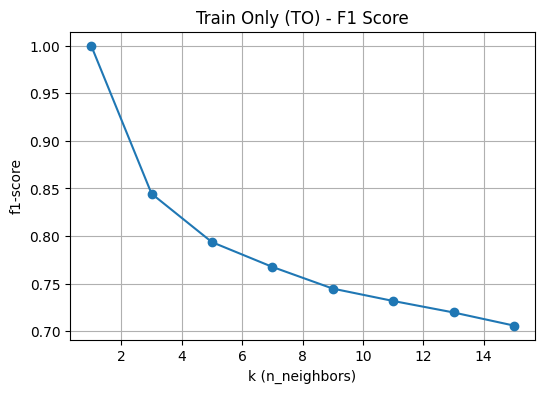

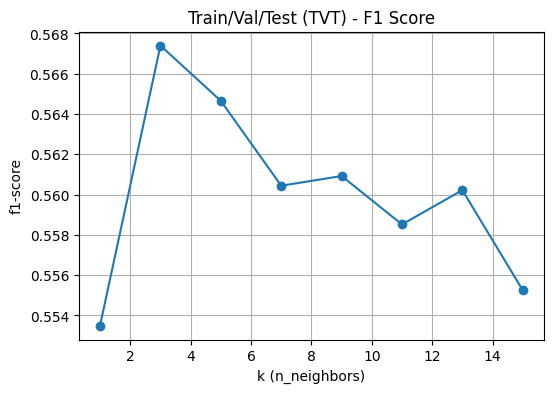

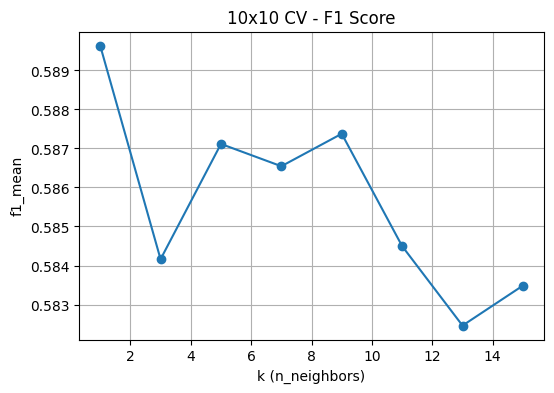

In [4]:
# RUN TIME = 5 min

parameters = {
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    }

to_scores = []
tvt_scores = []
cv_scores = []

for k in range(1,16,2):
    print("K =", k)
    kNN = KNeighborsClassifier(n_neighbors = k)

    metrics_to = run_model(X, y, kNN, "TO", None, f"models/ex_3_2/kNN_TO_k_{k}.pkl", f"kNN TO k = {k}", random_state=SEED, use_iris=False)
    metrics_tvt = run_model(X, y, kNN, "TVT", parameters, f"models/ex_3_2/kNN_TVT_k_{k}.pkl", f"kNN TT k = {k}", random_state=SEED, feature_ranking=False, use_iris=False)
    metrics_cv = run_model(X, y, kNN, "CV-base", parameters, f"models/ex_3_2/kNN_CV_k_{k}.pkl", f"kNN CV k = {k}", random_state=SEED, feature_ranking=False, printing=False, use_iris=False, flagPrintingFoldNumber=False)

    to_scores.append({
        'k': k,
        'f1-score': metrics_to['f1-score'],
        'recall': metrics_to['recall'],
        'precision': metrics_to['precision'],
        'confusion_matrix': metrics_to['confusion_matrix']
    })

    tvt_scores.append({
        'k': k,
        'f1-score': metrics_tvt['f1-score'],
        'recall': metrics_tvt['recall'],
        'precision': metrics_tvt['precision'],
        'confusion_matrix': metrics_tvt['confusion_matrix']
    })

    cv_scores.append({
        'k': k,
        'f1_mean': metrics_cv['f1-score']
        # 'recall': metrics_cv['recall'],
        # 'precision': metrics_cv['precision'],
        # 'cm_mean': metrics_cv['cm_mean'],
        # 'cm_std': metrics_cv['cm_std']
    })

plot_metrics(to_scores, metric_name='f1-score', title='Train Only (TO) - F1 Score')
plot_metrics(tvt_scores, metric_name='f1-score', title='Train/Val/Test (TVT) - F1 Score')
plot_metrics(cv_scores, metric_name='f1_mean', title='10x10 CV - F1 Score')

## EX 3.3

Treino: 6302 amostras
Validação: 3503 amostras
Teste: 3506 amostras
Score:
[353 352 356 132 133 136  15 209  11  12 342 125 341 345 319 101 123   1
   0 211   4 233 222 228 277 114  99 539 453 156 448 431 464 244 332 224
 497  13 257 112 499 255  22 442  23 334  26 365 367 376 338 429 169 287
 223 134 440 354 129 167 158 360 239 441 343 118 549  24 279 486   2 145
 283 162 470 407 475  48 261 444 455 147 382 477 250 462 323 306 266 140
 184   8 387 463  46 523 378 389 465 513 488 328 330 548  19  59 256 296
 321  57 541 111 510 454 110 544 517 349 404  30 511 543 331 466 173 413
  52 524  83 300 193 416 402 181 425  74 294 439 501 459  63 291 496 246
 371 303 529 151 520 481 492 213 528 104 451 397 333  68 219 218 410 415
 498 522 406 366 178 243 220 540 393 288 242 302 278 268 293 245 232 418
 542  37 452 272  71 476 516  35 419 401 417  84 121 197 122 315 358  89
 221 527 194 103 322 428 409 377  94 438 234 290 420 198 526 534 503 237
 214 199 403   3  67 398 355 525 545 189 157 108 

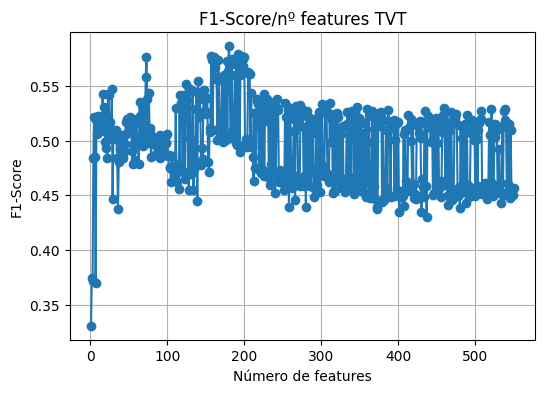

Resultados dos parâmetros guardados em: ./models/ex_3_3/ex_3_3_OneR_TVT_param_set_scores.csv
==========Best Model============
Best features number: 180
Best features: [353 352 356 132 133 136  15 209  11  12 342 125 341 345 319 101 123   1
   0 211   4 233 222 228 277 114  99 539 453 156 448 431 464 244 332 224
 497  13 257 112 499 255  22 442  23 334  26 365 367 376 338 429 169 287
 223 134 440 354 129 167 158 360 239 441 343 118 549  24 279 486   2 145
 283 162 470 407 475  48 261 444 455 147 382 477 250 462 323 306 266 140
 184   8 387 463  46 523 378 389 465 513 488 328 330 548  19  59 256 296
 321  57 541 111 510 454 110 544 517 349 404  30 511 543 331 466 173 413
  52 524  83 300 193 416 402 181 425  74 294 439 501 459  63 291 496 246
 371 303 529 151 520 481 492 213 528 104 451 397 333  68 219 218 410 415
 498 522 406 366 178 243 220 540 393 288 242 302 278 268 293 245 232 418]
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}

===== EX 3.3 TVT - 

In [5]:
# RUN TIME: 40 min

model = DecisionTreeClassifier(random_state=SEED)
parameters = {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }

filename = "./models/ex_3_3/ex_3_3_OneR_TVT"
metrics, best_score_with_val, bfs, best_parameters = run_model(X, y, model, "TVT", parameters, filename, label="EX 3.3 TVT - OneR", random_state=SEED, use_iris=False, printing=False, save_data=True)

print("\n\n")
print("val f1-score:", best_score_with_val)
print("test f1-score:", str(metrics["f1-score"]))
print("bfs:", bfs)
print("best parameters:", best_parameters)

In [ ]:
len(bfs)

In [12]:
print(bfs)
best_parameters

[353 352 356 132 133 136 209  15  11  12 342 125 341 345 101 319 123   1
   0 444 211   4 222 233 228 277 114 442 539  99 156 431 453 464 244 448
 334 224 497 332 112 499 257 255  13  22  23  26 223 287 365 367 376 540
 338 169 134 429 440 167 129 158 354 360 239 441 548 118 343 549  24 145
 279   2 486 542 162 283 470 407 261 475 147  48 455 323 507 443 382 477
 462 250 541 306 140 184 266   8 387 463 378  46 465 389 513 523 488 543
 328 321 544 256 296 330  59  19  57 397 333 111 110 517 510 454 404 524
 349  30 331 466 173 511  52  83 413 300 416 193 181 402  74 425 294 439
  63 291 501 459 246 496 371 303 151 529 213 528 492 481 520 104 451  68
 219 410 415 218 406 366 498 522 178 243 220 242 393 268 293 245 232 288
 418 302 278  37 452 272  71 476 516  35 419 401 417  84 121 197 122 438
 358 315  89 527 221 194]


{'max_depth': 10, 'min_samples_split': 10, 'criterion': 'gini'}

# EX 4 - MLP Existente

In [26]:
dic = split_set(X, y, random_state=SEED, use_iris=False)
X_train = dic["X_train"]
X_val = dic["X_val"]
y_train = dic["y_train"]
y_val = dic["y_val"]

# Chamar função
createMLP(X_train[:, bfs], y_train, X_val[:, bfs], y_val, 
          label="Teste_Sensores",
          hidden_layers=(150),
          learning_rate=0.01,
          max_iter=1000)

Treino: 6302 amostras
Validação: 3503 amostras
Teste: 3506 amostras

===== Teste_Sensores =====
Confusion Matrix:
[[736   0   0   1   0   0   0]
 [  0 375  23   0   0   0   0]
 [  0 244 104   0   0   0   0]
 [  6   0   0 366 274  42   1]
 [  1   0   0 269 380  34   0]
 [  0   0   0   4  13 415   0]
 [  0   0   0   1  14 200   0]]
Recall:    0.6124
Precision: 0.5921
F1-Score:  0.5737


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:788: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


{'confusion_matrix': array([[736,   0,   0,   1,   0,   0,   0],
        [  0, 375,  23,   0,   0,   0,   0],
        [  0, 244, 104,   0,   0,   0,   0],
        [  6,   0,   0, 366, 274,  42,   1],
        [  1,   0,   0, 269, 380,  34,   0],
        [  0,   0,   0,   4,  13, 415,   0],
        [  0,   0,   0,   1,  14, 200,   0]], dtype=int64),
 'recall': 0.6124447322859714,
 'precision': 0.5921224074304751,
 'f1-score': 0.5737423819310574}

## 4.1.

### Choose number of neurons

Treino: 6302 amostras
Validação: 3503 amostras
Teste: 3506 amostras
Neurónios  | F1-Score  
-------------------------
10         | 0.5752
25         | 0.5836
50         | 0.5725
75         | 0.5526
100        | 0.5733
150        | 0.5669
200        | 0.5720
300        | 0.5728
400        | 0.5707
500        | 0.5672
1000       | 0.5694


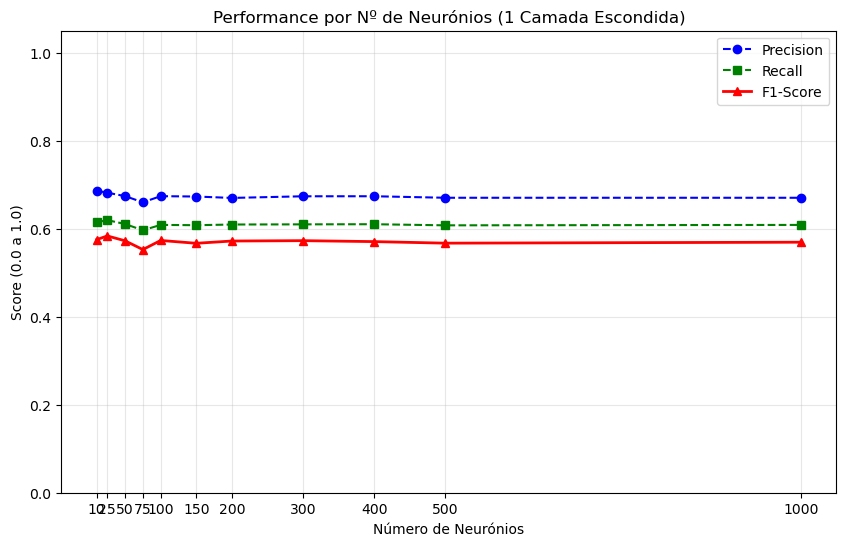

O melhor resultado foi com 25 neurónios.
F1 Score atingido: 0.5836271508831461


In [ ]:
# RUN TIME: 21 min

dic = split_set(X, y, random_state=SEED, use_iris=False)
X_train = dic["X_train"]
X_val = dic["X_val"]
y_train = dic["y_train"]
y_val = dic["y_val"]

results = createMLP_variableSizes(
    X_train[:, bfs], y_train, X_val[:, bfs], y_val,
    sizes_to_test=[10,25,50,75,100,150,200,300,400,500,1000],
    learning_rate_type='constant',
    learning_rate=0.01, # Valor inicial
    momentum=0.0
)

melhor_f1 = max(results['f1_scores'])
indice_melhor = results['f1_scores'].index(melhor_f1)
melhor_size = results['sizes'][indice_melhor]

print(f"O melhor resultado foi com {melhor_size} neurónios.")
print(f"F1 Score atingido: {melhor_f1}")


### Choose activation Function

In [ ]:
# RUN TIME: 1m10s

activations = ["relu", "identity", "logistic", "tanh"]

resultados_por_ativacao = {} 

best_f1 = 0
best_activation = ""

for act in activations:
    metrics = createMLP(
        X_train[:, bfs], y_train, X_val[:, bfs], y_val, 
        hidden_layers=(melhor_size,), 
        activation=act, 
        label=f"4.1 - Fixed learning rate - {act}"
    )
    
    current_f1 = metrics['f1-score'] 
    resultados_por_ativacao[act] = current_f1
    
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_activation = act

print("-" * 30)
print(f"Melhor Ativação: {best_activation}")
print(f"F1 Score: {best_f1:.4f}")


===== 4.1 - Fixed learning rate - relu =====
Confusion Matrix:
[[737   0   0   0   0   0   0]
 [  0 396   2   0   0   0   0]
 [  0 314  34   0   0   0   0]
 [  0   0   0 404 254  19  12]
 [  0   0   0 300 351  14  19]
 [  0   0   0   4   6 354  68]
 [  0   0   0   2  10 142  61]]
Recall:    0.6136
Precision: 0.6696
F1-Score:  0.5813

===== 4.1 - Fixed learning rate - identity =====
Confusion Matrix:
[[736   0   0   0   1   0   0]
 [  0 398   0   0   0   0   0]
 [  0 327  21   0   0   0   0]
 [  0   0   0 388 263  23  15]
 [  2   0   0 271 376  12  23]
 [  0   0   0   3   8 289 132]
 [  0   0   0   2  11 102 100]]
Recall:    0.6151
Precision: 0.6786
F1-Score:  0.5772

===== 4.1 - Fixed learning rate - logistic =====
Confusion Matrix:
[[737   0   0   0   0   0   0]
 [  0 390   8   0   0   0   0]
 [  0 224 124   0   0   0   0]
 [  8   0   0 365 250  66   0]
 [  1   0   0 279 336  68   0]
 [  0   0   0   2  13 417   0]
 [  0   0   0   2  11 202   0]]
Recall:    0.6175
Precision: 0.6043
F1

### Test Set results

In [35]:
# RUN TIME: 20 seg
X_train_orig = dic["X_train_orig"]
y_train_orig = dic["y_train_orig"]
X_test = dic["X_test"]
y_test = dic["y_test"]

metrics = createMLP(
    X_train_orig[:, bfs], y_train_orig, X_test[:, bfs], y_test, 
    hidden_layers=(melhor_size,),
    activation=best_activation,
    label=f"4.1 - Fixed learning rate - num neuro {melhor_size} - {best_activation}"
)


===== 4.1 - Fixed learning rate - num neuro 50 - relu =====
Confusion Matrix:
[[752   0   1   0   2   0   0]
 [  0 144 254   0   0   0   0]
 [  0   9 394   0   0   0   0]
 [ 11   0   0 252 392   4   8]
 [  5   0   0 121 525   3   1]
 [  0   0   0  23   2 256 144]
 [  0   0   0   1   9  57 136]]
Recall:    0.6839
Precision: 0.7139
F1-Score:  0.6622


## 4.2

invscaling - a taxa de aprendizagem diminui a cada iteraçao de acordo com uma formula

adaptive - a taxa de aprendizagem só diminui quando a validaçao nao melhora

### Choose number of neurons

Treino: 6302 amostras
Validação: 3503 amostras
Teste: 3506 amostras
Neurónios  | F1-Score  
-------------------------
10         | 0.5752
25         | 0.5836
50         | 0.5725
75         | 0.5526
100        | 0.5720
150        | 0.5669
200        | 0.5720
300        | 0.5728
400        | 0.5707
500        | 0.5672
1000       | 0.5694


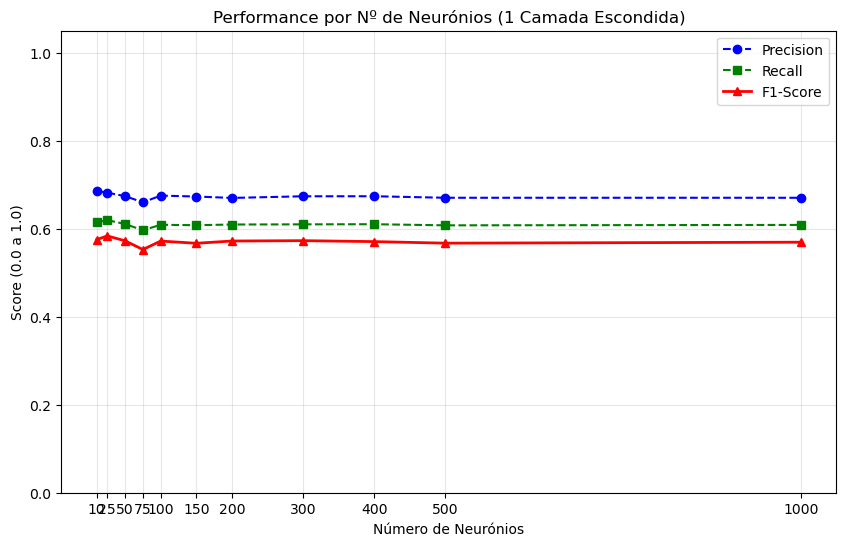

O melhor resultado foi com 25 neurónios.
F1 Score atingido: 0.5836271508831461


In [ ]:
# RUN TIME: 20 min

results = createMLP_variableSizes(
    X_train[:, bfs], y_train, X_val[:, bfs], y_val,
    sizes_to_test=[10,25,50,75,100,150,200,300,400,500,1000],
    learning_rate_type='adaptive',  
    learning_rate=0.01, # Valor inicial
    momentum=0.0,
)

melhor_f1 = max(results['f1_scores'])
indice_melhor = results['f1_scores'].index(melhor_f1)
melhor_size = results['sizes'][indice_melhor]

print(f"O melhor resultado foi com {melhor_size} neurónios.")
print(f"F1 Score atingido: {melhor_f1}")

### Choose activation function

In [29]:
# RUN TIME: 

activations = ["relu", "identity", "logistic", "tanh"]

resultados_por_ativacao = {} 

best_f1 = 0
best_activation = ""

for act in activations:
    metrics = createMLP(
        X_train[:, bfs], y_train, X_val[:, bfs], y_val, 
        hidden_layers=(melhor_size,), 
        activation=act, 
        learning_rate_type='adaptive',  
        learning_rate=0.01, # Valor inicial
        momentum=0.0,
        label=f"4.2 - Variable learning rate - {act}"
    )
    
    current_f1 = metrics['f1-score'] 
    resultados_por_ativacao[act] = current_f1
    
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_activation = act

print("-" * 30)
print(f"Melhor Ativação: {best_activation}")
print(f"F1 Score: {best_f1:.4f}")


===== 4.2 - Variable learning rate - relu =====
Confusion Matrix:
[[737   0   0   0   0   0   0]
 [  0 396   2   0   0   0   0]
 [  0 314  34   0   0   0   0]
 [  0   0   0 404 254  19  12]
 [  0   0   0 300 351  14  19]
 [  0   0   0   4   6 354  68]
 [  0   0   0   2  10 142  61]]
Recall:    0.6136
Precision: 0.6696
F1-Score:  0.5813

===== 4.2 - Variable learning rate - identity =====
Confusion Matrix:
[[736   0   0   0   1   0   0]
 [  0 398   0   0   0   0   0]
 [  0 327  21   0   0   0   0]
 [  0   0   0 388 263  23  15]
 [  2   0   0 271 376  12  23]
 [  0   0   0   3   8 289 132]
 [  0   0   0   2  11 102 100]]
Recall:    0.6151
Precision: 0.6786
F1-Score:  0.5772

===== 4.2 - Variable learning rate - logistic =====
Confusion Matrix:
[[737   0   0   0   0   0   0]
 [  0 390   8   0   0   0   0]
 [  0 224 124   0   0   0   0]
 [  8   0   0 365 250  66   0]
 [  1   0   0 279 336  68   0]
 [  0   0   0   2  13 417   0]
 [  0   0   0   2  11 202   0]]
Recall:    0.6175
Precision: 

### Test Set Results

In [ ]:
# RUN TIME: 50 seg

metrics = createMLP(
        X_train_orig[:, bfs], y_train_orig, X_test[:, bfs], y_test, 
        hidden_layers=(melhor_size,),
        activation=best_activation,
        learning_rate_type='adaptive',  
        learning_rate=0.01, # Valor inicial
        momentum=0.0,
        label=f"4.2 - Variable learning rate - {act}"
)


===== 4.2 - Variable learning rate - tanh =====
Confusion Matrix:
[[752   0   1   0   2   0   0]
 [  0 144 254   0   0   0   0]
 [  0   9 394   0   0   0   0]
 [ 11   0   0 252 392   4   8]
 [  5   0   0 121 525   3   1]
 [  0   0   0  23   2 256 144]
 [  0   0   0   1   9  57 136]]
Recall:    0.6839
Precision: 0.7139
F1-Score:  0.6622


## 4.3

### Choose number of neurons

Neurónios  | F1-Score  
-------------------------
10         | 0.5415
25         | 0.5460
50         | 0.5561
75         | 0.5332
100        | 0.5315
150        | 0.5483
200        | 0.5334
500        | 0.5475
1000       | 0.5491


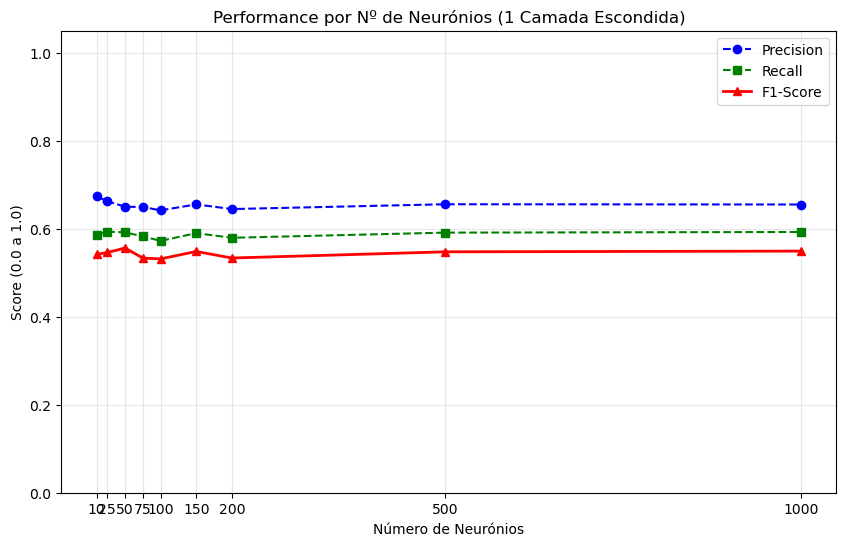

O melhor resultado foi com 50 neurónios.
F1 Score atingido: 0.5561379318694438


In [31]:
results = createMLP_variableSizes(
    X_train[:, bfs], y_train, X_val[:, bfs], y_val,
    sizes_to_test=[10,25,50,75,100,150,200,500,1000],
    learning_rate_type='adaptive',  
    learning_rate=0.01, # Valor inicial
    momentum=0.9, # Valor típico de momentum (0.9)
)

melhor_f1 = max(results['f1_scores'])
indice_melhor = results['f1_scores'].index(melhor_f1)
melhor_size = results['sizes'][indice_melhor]

print(f"O melhor resultado foi com {melhor_size} neurónios.")
print(f"F1 Score atingido: {melhor_f1}")

### Choose activation Function

In [ ]:
# RUN TIME: 1m 45s

activations = ["relu", "identity", "logistic", "tanh"]

resultados_por_ativacao = {} 

best_f1 = 0
best_activation = ""

for act in activations:
    metrics = createMLP(
        X_train[:, bfs], y_train, X_val[:, bfs], y_val, 
        hidden_layers=(melhor_size,), 
        activation=act, 
        learning_rate_type='adaptive',  
        learning_rate=0.01, # Valor inicial
        momentum=0.9,
        label=f"4.3 - Variable learning rate with momentum - num neuro {melhor_size} - {act}"
    )
    
    current_f1 = metrics['f1-score'] 
    resultados_por_ativacao[act] = current_f1
    
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_activation = act

print("-" * 30)
print(f"Melhor Ativação: {best_activation}")
print(f"F1 Score: {best_f1:.4f}")


===== 4.3 - Variable learning rate with momentum - num neuro 50 - relu =====
Confusion Matrix:
[[722   1   0   5   9   0   0]
 [  0 398   0   0   0   0   0]
 [  0 326  22   0   0   0   0]
 [  0   0   0 272 369  28  20]
 [  0   0   0 218 411  16  39]
 [  0   0   0   9   1 261 161]
 [  0   0   0   3   7  96 109]]
Recall:    0.5928
Precision: 0.6548
F1-Score:  0.5507

===== 4.3 - Variable learning rate with momentum - num neuro 50 - identity =====
Confusion Matrix:
[[725   3   0   3   6   0   0]
 [  0 398   0   0   0   0   0]
 [  0 331  17   0   0   0   0]
 [  0   0   0 299 352  19  19]
 [  2   0   0 208 427  11  36]
 [  0   0   0   5   5 244 178]
 [  0   0   0   2   8  98 107]]
Recall:    0.5933
Precision: 0.6607
F1-Score:  0.5504

===== 4.3 - Variable learning rate with momentum - num neuro 50 - logistic =====
Confusion Matrix:
[[733   0   0   2   2   0   0]
 [  0 398   0   0   0   0   0]
 [  0 328  20   0   0   0   0]
 [  0   0   0 378 282  21   8]
 [  0   0   0 281 371  21  11]
 [  0

### Test Set Results

In [ ]:
# RUN TIME: 45 s

metrics = createMLP(
        X_train_orig[:, bfs], y_train_orig, X_test[:, bfs], y_test, 
        hidden_layers=(melhor_size,),
        activation=best_activation,
        learning_rate_type='adaptive',  
        learning_rate=0.01, # Valor inicial
        momentum=0.9,
        label=f"4.3 - Variable learning rate with momentum - num neuro {melhor_size} - {act}"
)


===== 4.3 - Variable learning rate with momentum - num neuro 50 - tanh =====
Confusion Matrix:
[[753   0   1   0   1   0   0]
 [  0 154 244   0   0   0   0]
 [  0   6 397   0   0   0   0]
 [ 12   0   0 257 378   9  11]
 [  5   0   0  88 553   6   3]
 [  0   0   0  17   5 289 114]
 [  0   0   0   0   8  81 114]]
Recall:    0.6915
Precision: 0.7251
F1-Score:  0.6737


# EX 5

In [ ]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

In [ ]:
import numpy as np
import pandas as pd

# Certifique-se de que a classe NeuralNetwork (o código grande anterior) já foi executada/importada

# 1. Definir a arquitetura
# X_train_orig[:, bfs].shape[1] dá-nos o número de colunas (features) automaticamente
input_size = X_train_orig[:, bfs].shape[1]
hidden_size = 50
output_size = int(np.max(y_train_orig)) + 1
print(output_size)

layer_sizes = [input_size, hidden_size, output_size]

# 2. Criar a rede
# Nota: Use o nome da classe que definiu (NeuralNetwork ou OurMLP)
nn = OurNeuralNetwork(layer_sizes, activation="relu", learning_rate=0.1)

# 3. Treinar com os dados SCALED
print("A iniciar treino...")
# O método train usa o forward -> backward -> update weights repetidamente
history = nn.train(X_train_orig[:, bfs], y_train_orig, epochs=1000)

# 4. Agora sim: Usar o Teste (Respondendo à sua pergunta)
print("\nA fazer previsões no conjunto de Teste...")
# O predict serve para QUALQUER dado. Aqui passamos o X_test (que tmb deve estar scaled)
preds_test = nn.evaluate(X_test[:, bfs], y_test) # Assumindo que você tem um X_test_scaled

preds_reais = nn.predict(X_test[:, bfs])

print("\nPrevisões (primeiras 10):", preds_reais[:10])

### Choose number of neurons

Input Size: 204 | Output Size: 8

---> A testar Hidden Layer Size: 10...
Epoch 0: Loss 2.0796
Epoch 100: Loss 1.0860
Epoch 200: Loss 0.8122
Epoch 300: Loss 0.7059
Epoch 400: Loss 0.6474
Epoch 500: Loss 0.6107
Epoch 600: Loss 0.5820
Epoch 700: Loss 0.5567
Epoch 800: Loss 0.5344
Epoch 900: Loss 0.5253

===== Size 10 =====
Confusion Matrix:
[[754   0   0   1   0   0   0]
 [  0 211 187   0   0   0   0]
 [  0  16 387   0   0   0   0]
 [ 13   0   0 617  22  15   0]
 [  6   0   0 525 114  10   0]
 [  0   0   0  30   0 395   0]
 [  0   0   0   9   1 193   0]]
Recall:    0.6454
Precision: 0.6539
F1-Score:  0.5958

---> A testar Hidden Layer Size: 25...
Epoch 0: Loss 2.0811
Epoch 100: Loss 1.1506
Epoch 200: Loss 0.8130
Epoch 300: Loss 0.6977
Epoch 400: Loss 0.6355
Epoch 500: Loss 0.5966
Epoch 600: Loss 0.5669
Epoch 700: Loss 0.5417
Epoch 800: Loss 0.5333
Epoch 900: Loss 0.5146

===== Size 25 =====
Confusion Matrix:
[[754   0   0   0   1   0   0]
 [  0 211 187   0   0   0   0]
 [  0  14 389   0  

,hidden_size,f1-score,precision,recall
0,10,0.595811,0.653948,0.645374
1,25,0.572871,0.662938,0.638225
2,50,0.592708,0.654755,0.646582
3,75,0.643515,0.642844,0.672135
4,100,0.597469,0.792644,0.647058
5,150,0.589176,0.650841,0.643006
6,200,0.600619,0.784367,0.646960


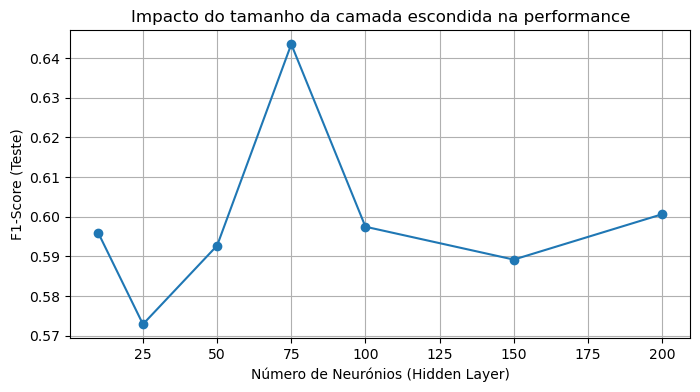

In [52]:
# RUN TIME: 4 min 25 seg

input_size = X_train_orig[:, bfs].shape[1] 
output_size = len(np.unique(y_train_orig)) + 1

sizes_to_test = [10, 25, 50, 75, 100, 150, 200]

best_f1 = -1
best_size = None
results_history = []

print(f"Input Size: {input_size} | Output Size: {output_size}")
print("===========================================")

# --- Loop de Teste ---
for hidden_size in sizes_to_test:
    np.random.seed(SEED)

    print(f"\n---> A testar Hidden Layer Size: {hidden_size}...")

    # 2. Definir arquitetura para este loop
    layer_sizes = [input_size, hidden_size, output_size]

    # 3. Criar a rede (Reiniciar a cada loop para não aproveitar pesos anteriores)
    nn = OurNeuralNetwork(layer_sizes, activation="relu", learning_rate=0.1)

    # 4. Treinar
    history = nn.train(X_train_orig[:, bfs], y_train_orig, epochs=1000)

    # 5. Avaliar no Teste
    metrics = nn.evaluate(X_test[:, bfs], y_test, label=f"Size {hidden_size}")
    
    current_f1 = metrics["f1-score"]

    # Guardar para tabela final
    results_history.append({
        "hidden_size": hidden_size,
        "f1-score": current_f1,
        "precision": metrics.get("precision", 0),
        "recall": metrics.get("recall", 0)
    })

    # 6. Verificar se é o melhor até agora
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_size = hidden_size

# --- Apresentação dos Resultados ---
print("\n===========================================")
print(f"MELHOR CONFIGURAÇÃO ENCONTRADA")
print(f"Melhor nº de neurónios: {best_size}")
print(f"Melhor F1-Score: {best_f1:.5f}")
print("===========================================")

# Mostrar tabela resumo
df_results = pd.DataFrame(results_history)
display(df_results)

# (Opcional) Gráfico da evolução
plt.figure(figsize=(8, 4))
plt.plot(df_results["hidden_size"], df_results["f1-score"], marker='o', linestyle='-')
plt.xlabel("Número de Neurónios (Hidden Layer)")
plt.ylabel("F1-Score (Teste)")
plt.title("Impacto do tamanho da camada escondida na performance")
plt.grid(True)
plt.show()

### Choose Activation Function

A usar arquitetura com 75 neurónios na camada escondida.

---> A testar Activation Function: RELU...
Epoch 0: Loss 2.0786
Epoch 100: Loss 0.9778
Epoch 200: Loss 0.7670
Epoch 300: Loss 0.6627
Epoch 400: Loss 0.6080
Epoch 500: Loss 0.5725
Epoch 600: Loss 0.5440
Epoch 700: Loss 0.5661
Epoch 800: Loss 0.5129
Epoch 900: Loss 0.4963

===== Activation relu =====
Confusion Matrix:
[[754   0   0   1   0   0   0]
 [  0 222 176   0   0   0   0]
 [  0  20 383   0   0   0   0]
 [ 13   0   0 454 184  16   0]
 [  7   0   0 260 379   9   0]
 [  0   0   0  26   0 399   0]
 [  0   0   0   7   3 193   0]]
Recall:    0.6721
Precision: 0.6428
F1-Score:  0.6435

---> A testar Activation Function: SIGMOID...
Epoch 0: Loss 2.0821
Epoch 100: Loss 1.8192
Epoch 200: Loss 1.3921
Epoch 300: Loss 1.1974
Epoch 400: Loss 1.0602
Epoch 500: Loss 0.9671
Epoch 600: Loss 0.9170
Epoch 700: Loss 0.8833
Epoch 800: Loss 0.8540
Epoch 900: Loss 0.8245

===== Activation sigmoid =====
Confusion Matrix:
[[755   0   0   0   0   0  

,activation,f1-score,precision,recall,loss_final
0,relu,0.643515,0.642844,0.672135,0.482326
1,sigmoid,0.440762,0.480463,0.507390,0.794443


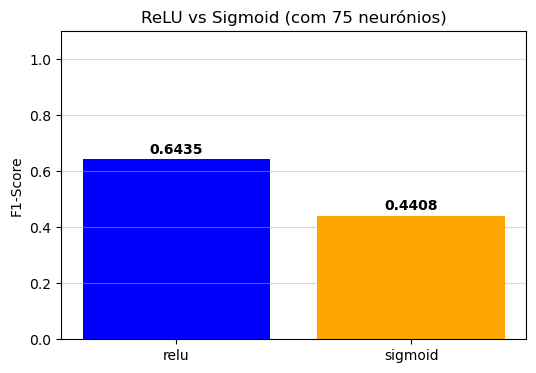

In [53]:
# RUN TIME: 32 seg

activations_to_test = ["relu", "sigmoid"]

best_f1_act = -1
best_activation = None
results_act_history = []

print(f"A usar arquitetura com {best_size} neurónios na camada escondida.")
print("===========================================")

# --- Loop de Teste ---
for act_func in activations_to_test:
    np.random.seed(SEED)
    
    print(f"\n---> A testar Activation Function: {act_func.upper()}...")

    # 1. Definir arquitetura (Input -> Best_Size -> Output)
    layer_sizes = [input_size, best_size, output_size]

    # 2. Criar a rede
    # Nota: Sigmoid as vezes precisa de um learning rate menor para não oscilar, 
    # mas para comparar mantemos igual (0.1 ou 0.01).
    nn = OurNeuralNetwork(layer_sizes, activation=act_func, learning_rate=0.1)

    # 3. Treinar
    history = nn.train(X_train_orig[:, bfs], y_train_orig, epochs=1000)

    # 4. Avaliar
    metrics = nn.evaluate(X_test[:, bfs], y_test, label=f"Activation {act_func}")
    
    current_f1 = metrics["f1-score"]

    # Guardar resultados
    results_act_history.append({
        "activation": act_func,
        "f1-score": current_f1,
        "precision": metrics.get("precision", 0),
        "recall": metrics.get("recall", 0),
        "loss_final": history[-1] # Interessante ver qual convergiu melhor
    })

    # 5. Verificar o melhor
    if current_f1 > best_f1_act:
        best_f1_act = current_f1
        best_activation = act_func

# --- Apresentação dos Resultados ---
print("\n===========================================")
print(f"Melhor Neurónios: {best_size}")
print(f"Melhor Ativação: {best_activation}")
print(f"Melhor F1-Score: {best_f1_act:.5f}")
print("===========================================")

# Tabela Resumo
df_results_act = pd.DataFrame(results_act_history)
display(df_results_act)

# Comparação Visual
plt.figure(figsize=(6, 4))
plt.bar(df_results_act["activation"], df_results_act["f1-score"], color=['blue', 'orange'])
plt.ylim(0, 1.1) # Escala de 0 a 1
plt.ylabel("F1-Score")
plt.title(f"ReLU vs Sigmoid (com {best_size} neurónios)")
plt.grid(axis='y', alpha=0.5)
for i, v in enumerate(df_results_act["f1-score"]):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontweight='bold')
plt.show()